Data preprocessing steps



Problem Statement : Building a website integraded with AI/ML model helping to improve the english along with providing the report on how long will it take to achieve the desired goal

Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

Loading the dataset

In [3]:
df = pd.read_csv('/content/dsml.csv')

Understanding data


In [4]:
df.head()

,Initial Proficiency (%),Session Duration (minutes),Improvement Rate (%),Total Days Required,Minutes Per Day,Target Proficiency (%)
0,53.86,28.23,0.22,167,0.17,90
1,40.38,16.67,0.17,300,0.06,90
2,38.96,15.55,0.16,323,0.05,90
3,44.70,24.32,0.22,203,0.12,90
4,7.42,58.10,0.90,93,0.62,90


In [5]:
df.shape

(10000, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Initial Proficiency (%)     10000 non-null  float64
 1   Session Duration (minutes)  10000 non-null  float64
 2   Improvement Rate (%)        10000 non-null  float64
 3   Total Days Required         10000 non-null  int64  
 4   Minutes Per Day             10000 non-null  float64
 5   Target Proficiency (%)      10000 non-null  int64  
dtypes: float64(4), int64(2)
memory usage: 468.9 KB


In [7]:
df.describe()

,Initial Proficiency (%),Session Duration (minutes),Improvement Rate (%),Total Days Required,Minutes Per Day,Target Proficiency (%)
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0
mean,40.406708,34.830887,0.346243,172.803100,0.301134,90.0
std,23.281413,14.423178,0.205295,97.137147,0.222877,0.0
min,0.000000,10.010000,0.030000,53.000000,0.020000,90.0
25%,20.350000,22.450000,0.180000,102.000000,0.110000,90.0
50%,40.585000,34.860000,0.300000,138.000000,0.255000,90.0
75%,61.012500,47.350000,0.480000,214.000000,0.470000,90.0
max,79.990000,59.990000,0.990000,536.000000,1.120000,90.0


Data visualization

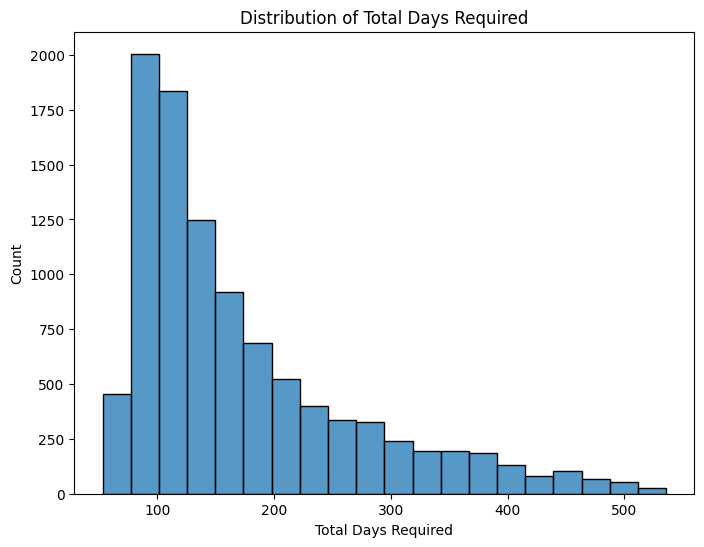

In [8]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Total Days Required'], bins=20)  # Adjust the number of bins as needed
plt.xlabel('Total Days Required')
plt.ylabel('Count')
plt.title('Distribution of Total Days Required')
plt.show()


The dataset used consists of columns :  
1)Initial Proficiency (%)
2)Session Duration (minutes)  
3)Improvement Rate (%)       
4)Total Days Required          
5)Minutes Per Day             
6)Target Proficiency (%)    

It also consists of (10000, 6)


Identifying the missing values

In [9]:
df.isnull()

,Initial Proficiency (%),Session Duration (minutes),Improvement Rate (%),Total Days Required,Minutes Per Day,Target Proficiency (%)
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
9995,False,False,False,False,False,False
9996,False,False,False,False,False,False
9997,False,False,False,False,False,False
9998,False,False,False,False,False,False


In [10]:
df.isnull().sum()

,0
Initial Proficiency (%),0
Session Duration (minutes),0
Improvement Rate (%),0
Total Days Required,0
Minutes Per Day,0
Target Proficiency (%),0


In [11]:
df.dropna(inplace=True)

From the above code we came to know that none of row had null values

Handling the duplicate values

In [15]:
df = df.drop_duplicates()

In [16]:
df.shape

(9998, 6)

Detecting the outliers

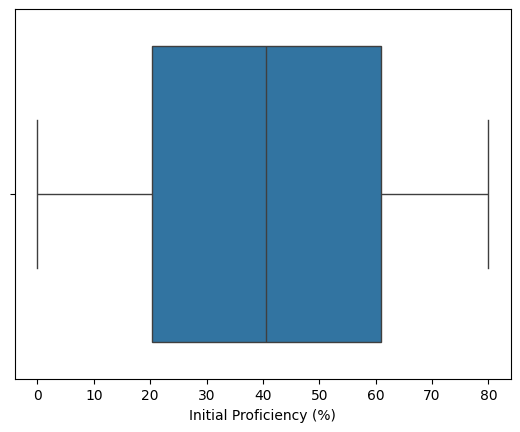

In [17]:
sns.boxplot(x=df['Initial Proficiency (%)'])
plt.show()


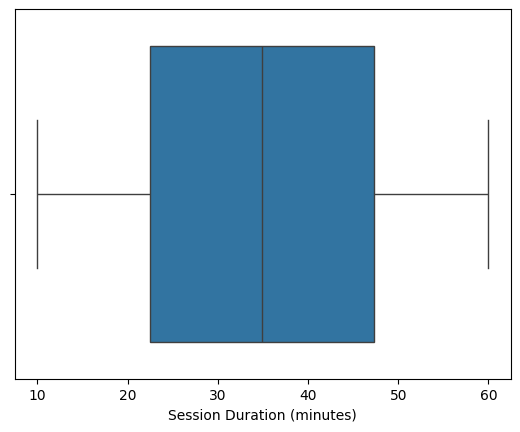

In [18]:
sns.boxplot(x=df['Session Duration (minutes)'])
plt.show()


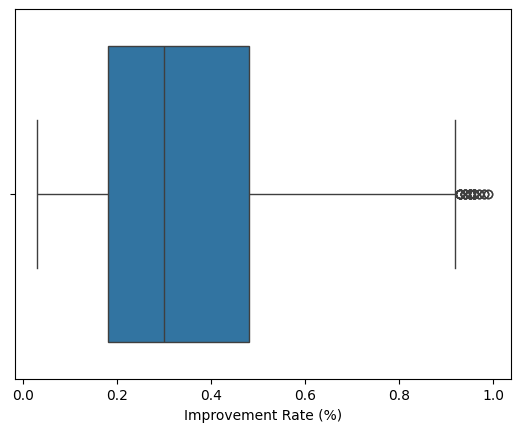

In [19]:
sns.boxplot(x=df['Improvement Rate (%)'])
plt.show()


In [20]:
Q1 = df['Improvement Rate (%)'].quantile(0.25)
Q3 = df['Improvement Rate (%)'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df['Improvement Rate (%)'] = np.where(df['Improvement Rate (%)'] > upper_bound, upper_bound,
                                      np.where(df['Improvement Rate (%)'] < lower_bound, lower_bound, df['Improvement Rate (%)']))


After capping the outliers using the IQR

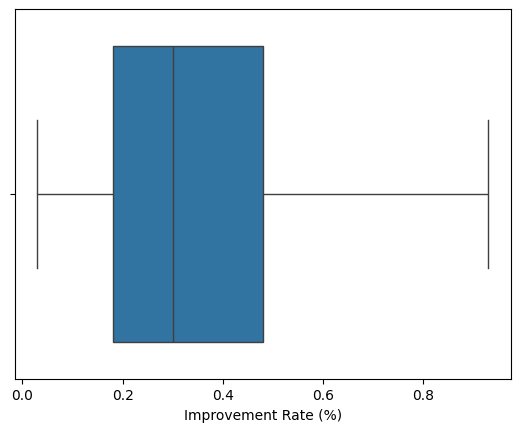

In [21]:
sns.boxplot(x=df['Improvement Rate (%)'])
plt.show()

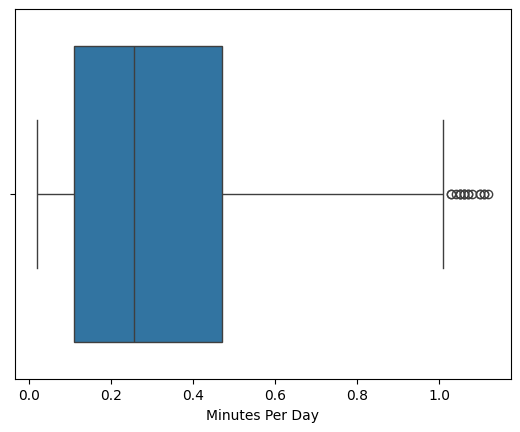

In [22]:
sns.boxplot(x=df['Minutes Per Day'])
plt.show()

In [23]:
Q1 = df['Minutes Per Day'].quantile(0.25)
Q3 = df['Minutes Per Day'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df['Minutes Per Day'] = np.where(df['Minutes Per Day'] > upper_bound, upper_bound,
                                      np.where(df['Minutes Per Day'] < lower_bound, lower_bound, df['Minutes Per Day']))

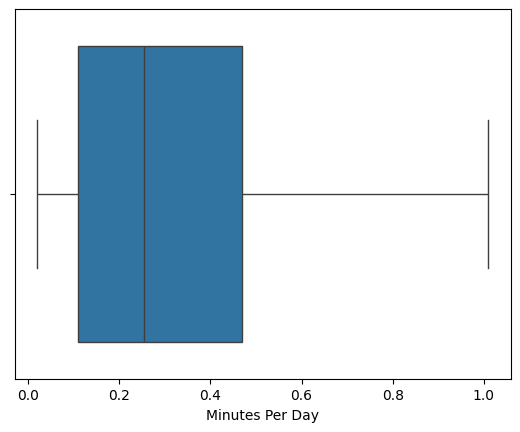

In [24]:
sns.boxplot(x=df['Minutes Per Day'])
plt.show()

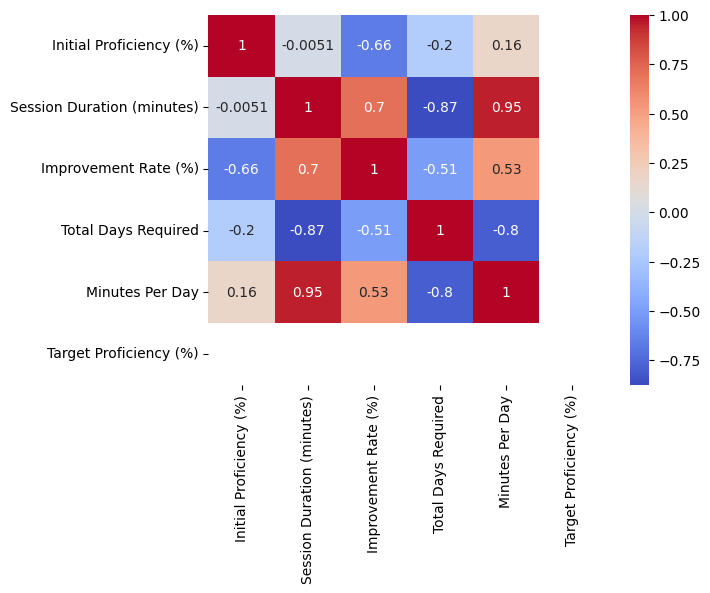

In [25]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


Session Duration and Improvement Rate (0.7):

There is a strong positive correlation. This suggests that as the session duration increases, the improvement rate also tends to increase, indicating that longer sessions may lead to better performance improvements.

Session Duration and Target Proficiency (0.95):

This indicates a very strong positive correlation. It implies that longer session durations are strongly associated with achieving a higher target proficiency, suggesting that more time spent in sessions could lead to better outcomes.

Total Days Required and Session Duration (-0.87):

This strong negative correlation indicates that more days required correlate with shorter session durations. It suggests that individuals who need more days to achieve their goals tend to have shorter sessions.

Improvement Rate and Target Proficiency (0.53):

A moderate positive correlation suggests that higher improvement rates are associated with higher target proficiency levels, indicating that students who show more improvement are likely to achieve better overall proficiency.

Minutes Per Day and Target Proficiency (1):

A perfect positive correlation suggests that the number of minutes spent per day correlates exactly with the target proficiency. This indicates that this variable is a perfect predictor of target proficiency in your dataset.
Importance of Correlation Analysis

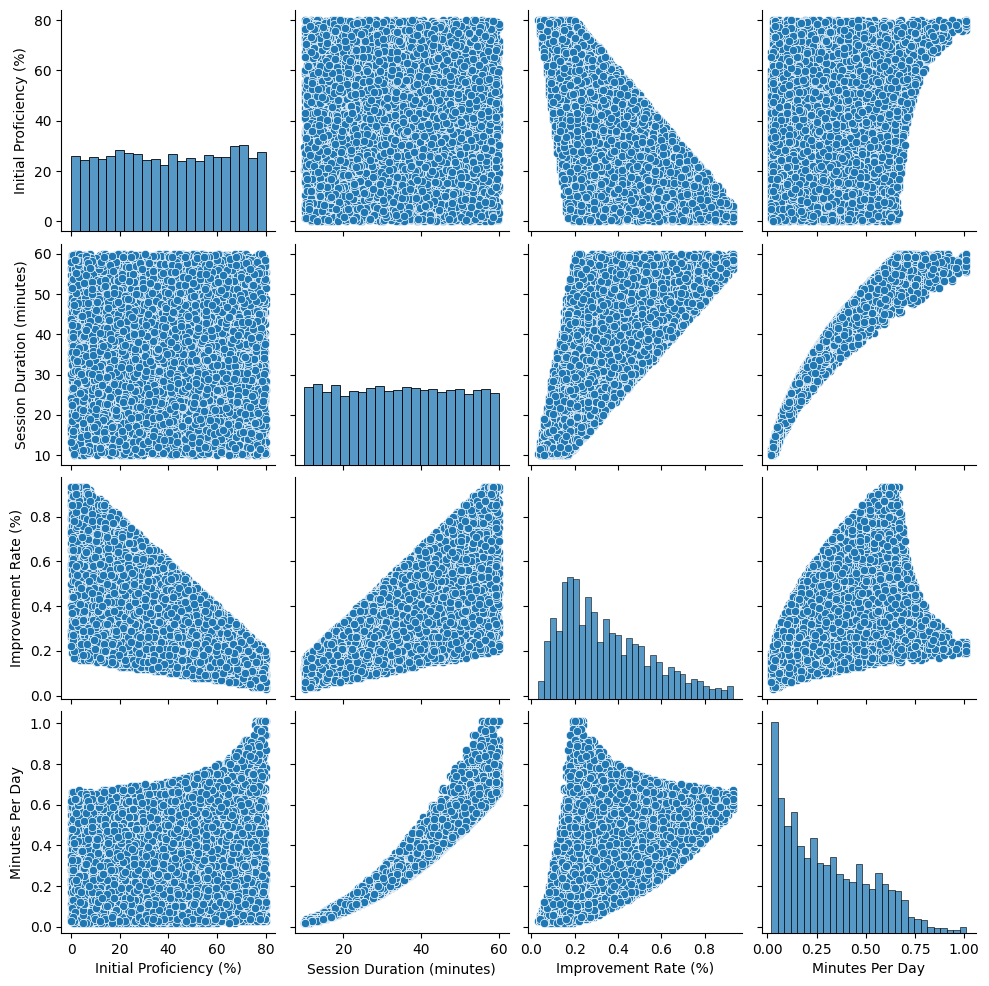

In [26]:
sns.pairplot(df[['Initial Proficiency (%)', 'Session Duration (minutes)', 'Improvement Rate (%)','Minutes Per Day']])
plt.show()

**Initial Proficiency vs. Improvement Rate:**
 The data appears to show a negative correlation. As the initial proficiency increases, the improvement rate tends to decrease. This is expected because higher initial proficiency often means less room for further improvement.

**Initial Proficiency vs. Minutes Per Day:**
The relationship seems positive. Those with higher initial proficiency may tend to spend more minutes per day, possibly indicating that more skilled users invest more time in their sessions.

**Improvement Rate vs. Session Duration: **
There seems to be no clear trend between improvement rate and session duration, indicating that the length of the session might not directly affect how quickly users improve.

**Minutes Per Day vs. Session Duration: **
 It seems that users who spend more minutes per day on average also have longer session durations, as indicated by the curved pattern.

In [27]:
df = df.to_csv('preprocessed_data.csv', index=False)


1. Code to Train and Save the Model: Linear Regression

In [28]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib  # For saving the model

# Load the dataset
data = pd.read_csv('/content/preprocessed_data.csv')

# Feature Selection
X = data[['Initial Proficiency (%)', 'Session Duration (minutes)', 'Improvement Rate (%)', 'Minutes Per Day']]
y = data['Total Days Required']

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Model Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f} days")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f} days")
print(f"R-squared (R²): {r2:.2f}")

# Save the trained model to a file
model_filename = 'trained_english_proficiency_model.pkl'
joblib.dump(model, model_filename)
print(f'Model saved as {model_filename}')


Model Evaluation Metrics:
Mean Absolute Error (MAE): 24.40 days
Mean Squared Error (MSE): 1039.30
Root Mean Squared Error (RMSE): 32.24 days
R-squared (R²): 0.89
Model saved as trained_english_proficiency_model.pkl


In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Load your dataset
df = pd.read_csv('/content/preprocessed_data.csv')
# Prepare the features and target (only using 'Initial Proficiency (%)' and 'Total Days Required')
X = df[['Initial Proficiency (%)', 'Total Days Required']]  # Input features
y = df['Minutes Per Day']  # Target: time needed per day (in minutes)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize the Gradient Boosting Regressor model
gbm_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Use GridSearchCV for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
}

grid_search = GridSearchCV(gbm_regressor, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the model
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)  # Calculate the R-squared score

print(f"Mean Squared Error: {mse:.2f} (minutes^2)")
print(f"R-squared value: {r2:.2f}")  # Output the R-squared value

# Get user input for Initial Proficiency and Total Days Required
initial_proficiency_input = float(input("Enter Initial Proficiency (%): "))  # User's initial proficiency
days_required_input = int(input("Enter Total Days Required: "))  # Number of days the student wants to improve

# Create a DataFrame for the new student's input
new_student = pd.DataFrame([[initial_proficiency_input, days_required_input]],
                           columns=['Initial Proficiency (%)', 'Total Days Required'])

# Scale the input features
new_student_scaled = scaler.transform(new_student)

# Predict the time needed per day based on the user's input
predicted_minutes_per_day = best_model.predict(new_student_scaled)

# Output the prediction
print(f"\nPredicted Time Needed Per Day (in minutes): {predicted_minutes_per_day[0]:.2f}")


Mean Squared Error: 0.00 (minutes^2)
R-squared value: 1.00
Enter Initial Proficiency (%): 79
Enter Total Days Required: 23

Predicted Time Needed Per Day (in minutes): 1.01


Decision Tree

In [33]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pandas as pd
from sklearn import tree
import matplotlib.pyplot as plt

In [31]:
df=pd.read_csv('/content/preprocessed_data.csv')

In [32]:
features = df[['Initial Proficiency (%)', 'Session Duration (minutes)',]] ##'Improvement Rate (%)'
target_days = df['Total Days Required']
target_minutes = df['Minutes Per Day']

# Split the data
X_train, X_test, y_train_days, y_test_days = train_test_split(features, target_days, test_size=0.2, random_state=42)
X_train, X_test, y_train_minutes, y_test_minutes = train_test_split(features, target_minutes, test_size=0.2, random_state=42)


In [34]:
# For predicting Total Days Required
model_days = DecisionTreeRegressor(max_depth=5,random_state=42)
model_days.fit(X_train, y_train_days)


DecisionTreeRegressor(max_depth=5, random_state=42)

In [35]:
# For predicting Minutes Per Day
model_minutes = DecisionTreeRegressor(random_state=42)
model_minutes.fit(X_train, y_train_minutes)

DecisionTreeRegressor(random_state=42)

In [36]:
print(len(model_days.feature_importances_))

2


In [37]:
importance = model_days.feature_importances_
feature_names = ['Initial Proficiency', 'Session Duration']
for name, importance in zip(feature_names, importance):
    print(f"{name}: {importance:.4f}")

Initial Proficiency: 0.0519
Session Duration: 0.9481


In [38]:
from sklearn.metrics import r2_score

# Predict on the test set
pred_days = model_days.predict(X_test)
pred_minutes = model_minutes.predict(X_test)

# Evaluate Total Days Required model
mse_days = mean_squared_error(y_test_days, pred_days)
mae_days = mean_absolute_error(y_test_days, pred_days)
r2_days = r2_score(y_test_days, pred_days)  # Calculate R² score

# Evaluate Minutes Per Day model
mse_minutes = mean_squared_error(y_test_minutes, pred_minutes)
mae_minutes = mean_absolute_error(y_test_minutes, pred_minutes)
r2_minutes = r2_score(y_test_minutes, pred_minutes)  # Calculate R² score

# Print the results
print(f"Total Days Required - MSE: {mse_days}, MAE: {mae_days}, R²: {r2_days:.2f}")
print(f"Minutes Per Day - MSE: {mse_minutes}, MAE: {mae_minutes}, R²: {r2_minutes:.2f}")

Total Days Required - MSE: 161.7257417563324, MAE: 9.418021147316459, R²: 0.98
Minutes Per Day - MSE: 4.524999999999998e-05, MAE: 0.003095000000000019, R²: 1.00


In [39]:
import joblib

# Save the model to a file in Colab
joblib.dump(model_days, 'model_days.pkl')

['model_days.pkl']

In [40]:
print(f"R² for Minutes: {r2_minutes:.2f}")
print(f"R² for days : {r2_days:.2f}")

R² for Minutes: 1.00
R² for days : 0.98
